# Tutorial 6: RFE on all features

---

### Introduction

Hello, this notebook will show how to use RFE to perform further feature selection, as we found that most features are very highly correlated, therfore we would need to remove those using the tool that we mentioned above. 

In [14]:
print(1)

1


first, let us call the data

In [15]:
%store -r df_input_RG
%store -r y_RG
%store -r df_RG

In [16]:
y_RG = y_RG.map({'S': 1, 'B': 0})

---

calling some packages

In [17]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Data splitting </i></b> 

In [18]:
from sklearn.model_selection import train_test_split

Xtrain_finall, Xtest_finall, Ytrain_finall, Ytest_finall = train_test_split( df_input_RG, y_RG, test_size = 0.3, random_state=3, stratify=y_RG) # train and valid sets

Xtrain, Xtest, Ytrain, Ytest = train_test_split( Xtrain_finall, Ytrain_finall, test_size = 0.3, random_state=3, stratify=Ytrain_finall) # train and valid sets

In [19]:
print(Xtrain.shape)
print(Xtest.shape)

(275, 2074)
(118, 2074)


---

<b><i> get the best N features </i></b> 

In [20]:
%store -r featImp_RG

In [21]:
arrimp = np.array(featImp_RG).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[1316 1284 1093 1290   60 1034 1068 1029 1070 1107]


In [22]:
# cols_ordered = df_input_RG.columns[sorted_idx][-400:]
cols_ordered = df_input_RG.columns[sorted_idx]

cols_ordered

Index([1924.752, 1979.115, 1892.438, 1919.053,  1961.15, 1916.216,  2031.85,
       1670.516, 1962.635,  2233.11,
       ...
       1445.173, 1419.847, 1285.394, 1424.528,  850.046, 1248.864, 1269.657,
       1245.863, 1270.902, 1294.379],
      dtype='object', length=2074)

---

In [23]:
Xtrain[cols_ordered]

1924.752  1979.115  1892.438  1919.053  1961.150  1916.216  2031.850  \
44  -1.262660 -1.244932 -1.225221 -1.261046 -1.253218 -1.260546 -1.216589   
195  0.029038 -0.062715 -0.105898  0.029082 -0.022015  0.023594 -0.192147   
153 -1.182826 -1.165534 -1.148377 -1.181556 -1.175216 -1.182125 -1.136108   
428  0.371475  0.409882  0.444525  0.373682  0.392535  0.376073  0.475385   
307  0.636889  0.660021  0.662517  0.636313  0.650785  0.638491  0.691558   
..        ...       ...       ...       ...       ...       ...       ...   
130 -1.426483 -1.423111 -1.405101 -1.425129 -1.426492 -1.424248 -1.406980   
288  1.253711  1.266522  1.269546  1.255453  1.258841  1.255065  1.276402   
494  0.890011  0.907269  0.885836  0.886149  0.900297  0.887002  0.924622   
465  0.555348  0.589756  0.610575  0.556191  0.573925  0.558025  0.645707   
164 -0.846783 -0.836575 -0.819368 -0.844526 -0.842634 -0.845141 -0.820247   

     1670.516  1962.635  2233.110  ...  1445.173  1419.847  1285.394  \
44  -1.168698 -1.252788 -1.167451  ... -1.200121 -1.187941 -1.184098   
195 -0.815595 -0.025100 -0.406921  ... -0.374789 -0.397771 -0.973544   
153 -0.948594 -1.174508 -1.083726  ... -1.077361 -1.066583 -0.933537   
428  0.848140  0.393460  0.622458  ...  0.584107  0.607801  0.991264   
307  0.868651  0.650799  0.775918  ...  0.714676  0.721459  0.936847   
..        ...       ...       ...  ...       ...       ...       ...   
130 -1.145146 -1.426616 -1.350443  ... -1.347510 -1.339234 -1.073865   
288  1.288133  1.259270  1.300473  ...  1.296429  1.301937  1.266589   
494  1.084560  0.900601  0.996119  ...  0.870634  0.872324  1.137038   
465  0.884115  0.575261  0.754087  ...  0.725796  0.742219  0.930608   
164 -0.795115 -0.842113 -0.795215  ... -0.782852 -0.765806 -0.882053   

     1424.528  850.046   1248.864  1269.657  1245.863  1270.902  1294.379  
44  -1.191771 -1.105883 -1.185328 -1.184500 -1.185632 -1.184575 -1.183201  
195 -0.386318 -0.960269 -0.975631 -0.975455 -0.975118 -0.975309 -0.972193  
153 -1.072886 -1.054559 -0.935165 -0.936432 -0.935009 -0.936731 -0.930488  
428  0.597366  1.084171  0.993072  0.992722  0.992166  0.992922  0.986539  
307  0.717137  1.016063  0.938420  0.939431  0.939123  0.939351  0.933865  
..        ...       ...       ...       ...       ...       ...       ...  
130 -1.343608 -1.110433 -1.073058 -1.073298 -1.072917 -1.073716 -1.074169  
288  1.300555  1.230404  1.263158  1.264537  1.263018  1.264719  1.268620  
494  0.868412  1.107634  1.134909  1.137376  1.134889  1.137946  1.135481  
465  0.736838  1.080445  0.936175  0.934483  0.936023  0.933795  0.927645  
164 -0.771193 -1.034962 -0.890669 -0.890639 -0.889766 -0.890246 -0.873703  

[275 rows x 2074 columns]

### RFE

In [44]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression

In [45]:
# https://machinelearningmastery.com/rfe-feature-selection-in-python/
selected = []
imp_ind = []
imp_freq = []

for i in range(1, 51, 1):
    print(i)
    sfs = RFE(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=i)
    # fit sfs
    sfs.fit(Xtrain[cols_ordered].values, Ytrain)
    # summarize all features
    selected_feat = []
    for i in range(Xtrain[cols_ordered].shape[1]):
        if sfs.support_[i] == True:
            selected_feat.append(i)
            print('Column: %d, Selected %s,' % (i, sfs.support_[i]))
        
    # print()
    selected.append(selected_feat)
    
    result = list(set(imp_ind) ^ set(selected[-1]))
    imp_freq.extend(Xtrain[cols_ordered].columns[result])    
    imp_ind.extend(result)    
    
    print(selected[-1])
    print(result)
    print(imp_ind)
    print(imp_freq)
    print()
    
    

1
Column: 976, Selected True,
[976]
[976]
[976]
[1313.394]

2
Column: 192, Selected True,
Column: 976, Selected True,
[192, 976]
[192]
[976, 192]
[1313.394, 874.121]

3
Column: 192, Selected True,
Column: 770, Selected True,
Column: 976, Selected True,
[192, 770, 976]
[770]
[976, 192, 770]
[1313.394, 874.121, 1314.06]

4
Column: 192, Selected True,
Column: 770, Selected True,
Column: 976, Selected True,
Column: 1343, Selected True,
[192, 770, 976, 1343]
[1343]
[976, 192, 770, 1343]
[1313.394, 874.121, 1314.06, 873.826]

5
Column: 192, Selected True,
Column: 770, Selected True,
Column: 976, Selected True,
Column: 1255, Selected True,
Column: 1343, Selected True,
[192, 770, 976, 1255, 1343]
[1255]
[976, 192, 770, 1343, 1255]
[1313.394, 874.121, 1314.06, 873.826, 1314.726]

6
Column: 192, Selected True,
Column: 730, Selected True,
Column: 770, Selected True,
Column: 976, Selected True,
Column: 1255, Selected True,
Column: 1343, Selected True,
[192, 730, 770, 976, 1255, 1343]
[730]
[976, 1

---

In [46]:
print(len(selected ))
# selected.append(cols_ordered[-51:])
# selected.append(cols_ordered)

50


### LR

In [47]:
lr = LogisticRegression()

In [48]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

In [49]:
models = [[lr, 'lr', 14]]
par = [lr_par]

In [50]:
from source.ml_acc import get_accuracy_ml

In [51]:
num_ml_tools = len(par)
ml_dicts = {}

for m, par in zip(models, par):
    key0 = str(m[1])
    ml_dicts[key0] = {}
    for f in selected:
        print(cols_ordered[f])

        xtr =  Xtrain[cols_ordered].iloc[:, f]
        xte =  Xtest[cols_ordered].iloc[:, f]
        print(xtr)
        results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model

        key = str(m[1])+","+str(len(f))
        ml_dicts[key0][key] = {}

        ml_dicts[key0][key]['tot_acc'] = results[0]
        ml_dicts[key0][key]['jack_train'] = results[1]
        ml_dicts[key0][key]['jack_test'] = results[2]

Index([1313.394], dtype='object')
     1313.394
44  -1.180712
195 -0.964430
153 -0.920664
428  0.971692
307  0.923693
..        ...
130 -1.075412
288  1.273611
494  1.128683
465  0.918362
164 -0.845237

[275 rows x 1 columns]


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/

Index([874.121, 1313.394], dtype='object')
      874.121  1313.394
44  -1.112287 -1.180712
195 -0.954683 -0.964430
153 -1.047980 -0.920664
428  1.088603  0.971692
307  1.012599  0.923693
..        ...       ...
130 -1.113324 -1.075412
288  1.230877  1.273611
494  1.114271  1.128683
465  1.073525  0.918362
164 -1.026733 -0.845237

[275 rows x 2 columns]
Index([874.121, 1314.06, 1313.394], dtype='object')
      874.121   1314.06  1313.394
44  -1.112287 -1.180616 -1.180712
195 -0.954683 -0.963858 -0.964430
153 -1.047980 -0.920073 -0.920664
428  1.088603  0.970868  0.971692
307  1.012599  0.923043  0.923693
..        ...       ...       ...
130 -1.113324 -1.075454 -1.075412
288  1.230877  1.273503  1.273611
494  1.114271  1.128320  1.128683
465  1.073525  0.917937  0.918362
164 -1.026733 -0.844173 -0.845237

[275 rows x 3 columns]
Index([874.121, 1314.06, 1313.394, 873.826], dtype='object')
      874.121   1314.06  1313.394   873.826
44  -1.112287 -1.180616 -1.180712 -1.111556
195 -0.95468

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

---

In [52]:
import json

In [53]:
with open('ml_rg_fs.txt', 'w') as file:
     file.write(json.dumps(ml_dicts)) # use `json.loads` to do the reverse

In [54]:
import json
with open('ml_rg_fs.txt') as f:
    data = f.read()
    
ml_dicts = json.loads(data)

with open('base_rg_val.txt') as f:
    data = f.read()
    
baseDict = json.loads(data)
baseDict['lr'].keys()    

dict_keys(['lr, all'])

In [55]:
print(baseDict['lr'].keys()    )
print(ml_dicts['lr'].keys()    )

dict_keys(['lr, all'])
dict_keys(['lr,1', 'lr,2', 'lr,3', 'lr,4', 'lr,5', 'lr,6', 'lr,7', 'lr,8', 'lr,9', 'lr,10', 'lr,11', 'lr,12', 'lr,13', 'lr,14', 'lr,15', 'lr,16', 'lr,17', 'lr,18', 'lr,19', 'lr,20', 'lr,21', 'lr,22', 'lr,23', 'lr,24', 'lr,25', 'lr,26', 'lr,27', 'lr,28', 'lr,29', 'lr,30', 'lr,31', 'lr,32', 'lr,33', 'lr,34', 'lr,35', 'lr,36', 'lr,37', 'lr,38', 'lr,39', 'lr,40', 'lr,41', 'lr,42', 'lr,43', 'lr,44', 'lr,45', 'lr,46', 'lr,47', 'lr,48', 'lr,49', 'lr,50'])


In [56]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file

In [57]:
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 

    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])    

In [58]:
# base_val: [[['lr, all'], [0.8666666666666667], [0.07596838316753642]]]
print(arr_all[0][1])

[0.0, 0.6779661016949152, 0.6779661016949152, 0.6779661016949152, 0.6949152542372882, 0.7313432835820896, 0.7313432835820896, 0.7313432835820896, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7313432835820896, 0.7272727272727273, 0.7272727272727273, 0.7424242424242424, 0.7424242424242424, 0.7424242424242424, 0.7424242424242424, 0.746268656716418, 0.746268656716418, 0.7538461538461538, 0.7538461538461538, 0.7538461538461538, 0.7538461538461538, 0.7538461538461538, 0.7538461538461538, 0.7538461538461538, 0.8032786885245902, 0.8064516129032258, 0.7936507936507936, 0.7936507936507936, 0.78125, 0.78125, 0.78125, 0.7903225806451613, 0.7903225806451613, 0.7903225806451613, 0.7903225806451613, 0.7903225806451613, 0.7903225806451613, 0.7936507936507936, 0.7936507936507936, 0.7936507936507936, 0.8064516129032258, 0.8064516129032258, 0.8064516129032258, 0.8064516129032258, 0.8064516129032258, 0.8064516129032258, 0.8064516129032258]


[0.         0.06122449 0.12244898 0.18367347 0.24489796 0.30612245
 0.36734694 0.42857143 0.48979592 0.55102041 0.6122449  0.67346939
 0.73469388 0.79591837 0.85714286 0.91836735 0.97959184 1.04081633
 1.10204082 1.16326531 1.2244898  1.28571429 1.34693878 1.40816327
 1.46938776 1.53061224 1.59183673 1.65306122 1.71428571 1.7755102
 1.83673469 1.89795918 1.95918367 2.02040816 2.08163265 2.14285714
 2.20408163 2.26530612 2.32653061 2.3877551  2.44897959 2.51020408
 2.57142857 2.63265306 2.69387755 2.75510204 2.81632653 2.87755102
 2.93877551 3.        ]


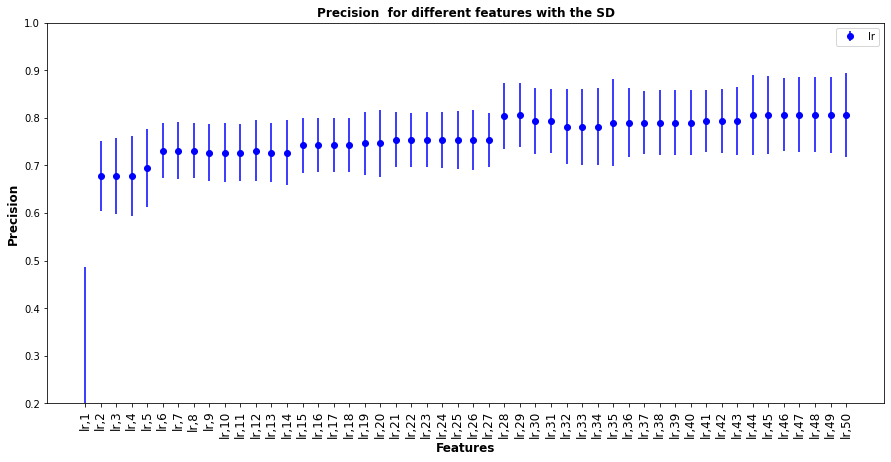

In [59]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  for different features with the SD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1

space = []
tickFeat = []

for result, model, color in zip(arr_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,50)
    print(a)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1

plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(.2, 1)
plt.legend()

plt.show()

In [60]:
arr_diff_all = []

for m, m_key in zip (models, ml_dicts.keys()):
    acc_diff_arr = [] 
    sd_diff_arr = [] 
    for f_key in ml_dicts[m_key].keys():
        value = f_key.split(',')
        acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ] - baseDict['lr']['lr, all'][ 'tot_acc' ]  )

        sd_train = jack_SD( baseDict['lr']['lr, all'][ 'jack_train' ], ml_dicts[m_key][f_key]['jack_train'] )[0]
        sd_test = jack_SD(  baseDict['lr']['lr, all'][ 'jack_test' ],  ml_dicts[m_key][f_key]['jack_test']   )[0]

        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_diff_arr.append(sd) # append sd_arr to an array
    arr_diff_all.append([ list(ml_dicts[m_key].keys()), acc_diff_arr, sd_diff_arr]) 

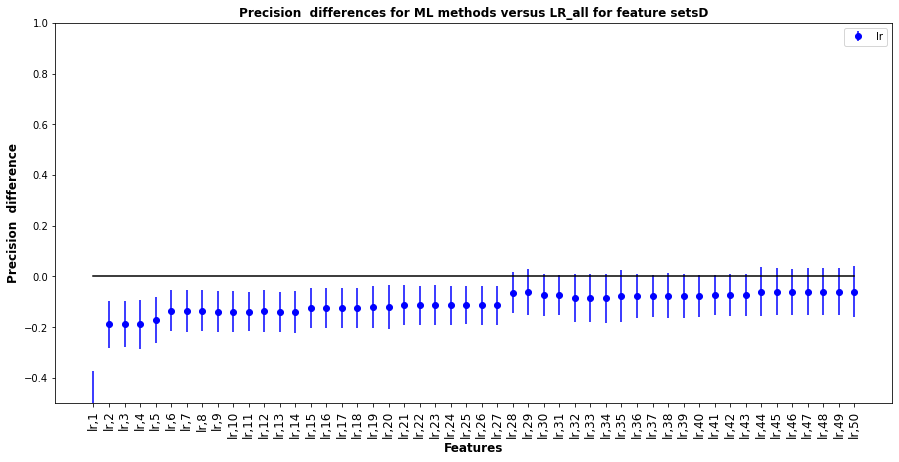

In [61]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  differences for ML methods versus LR_all for feature setsD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision  difference", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-0.5
space = []
tickFeat = []

for result, model, color in zip(arr_diff_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,50)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1
    
plt.plot(np.array(space), np.zeros(50*1), color = 'Black')        
plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(-.5, 1)
plt.legend()

plt.show()

In [62]:


RFE_ind = [976, 192, 770, 1343, 1255, 730, 1256, 1535, 1666, 1087, 932, 1830, 1334, 393, 2011, 945, 1667, 1163, 937, 1558, 1382, 1606, 564, 697, 1262, 773, 1826, 745, 2026, 1052, 1616, 1658, 834, 1912, 401, 1282, 843, 1568, 347, 1995, 1512, 1883, 1956, 99, 1934, 1188, 2043, 1056, 1856, 1923]
RFE_wave = [1313.394, 874.121, 1314.06, 873.826, 1314.726, 1503.852, 874.415, 1312.729, 1312.065, 874.71, 1311.401, 875.892, 1310.738, 875.005, 1509.104, 1310.076, 1309.415, 875.596, 1308.754, 875.3, 1316.73, 1504.725, 1308.093, 882.151, 1315.393, 1316.061, 1502.98, 2480.996, 1509.983, 894.014, 1307.433, 893.706, 1306.774, 1508.226, 1306.116, 898.662, 1301.526, 904.936, 1317.399, 1497.77, 1920.475, 1510.863, 1300.873, 904.62, 1302.18, 898.974, 1507.349, 1305.458, 1302.834, 1498.636]


[1313.394, 874.121, 1314.06, 873.826, 1314.726, 1503.852, 874.415, 1312.729, 1312.065, 874.71]
[1311.401, 875.892, 1310.738, 875.005, 1509.104, 1310.076, 1309.415, 875.596, 1308.754, 875.3]
[1316.73, 1504.725, 1308.093, 882.151, 1315.393, 1316.061, 1502.98, 2480.996, 1509.983, 894.014]
[1307.433, 893.706, 1306.774, 1508.226, 1306.116, 898.662, 1301.526, 904.936, 1317.399, 1497.77]


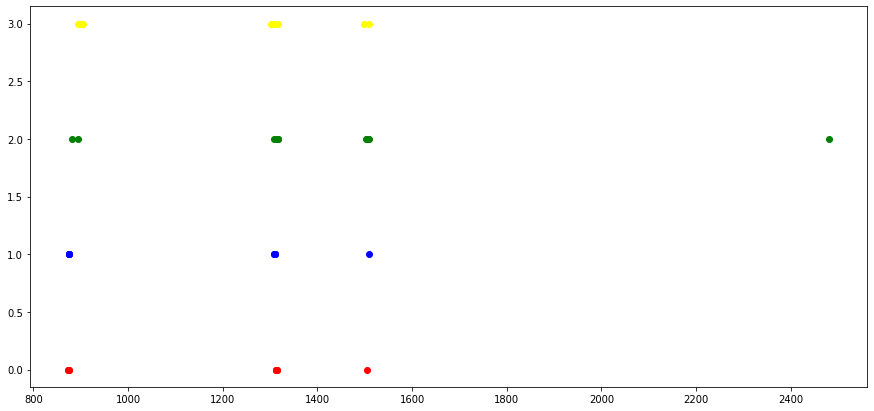

In [83]:
plt.rcParams["figure.figsize"] = (15,7)# 'xtick.labelsize', 'ytick.labelsize'
# plt.rcParams['ytick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
# plt.rcParams['xtick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
# plt.rcParams['axes.labelsize'] = 15
# plt.rcParams['axes.titlesize'] = 15
arrr= [0, 10, 20, 30, 40]
colrs = ['red', 'blue', 'green', 'yellow']
for i in range (4):
    
    print(RFE_wave[arrr[i]:arrr[i+1]])
                   
    plt.scatter(RFE_wave[arrr[i]:arrr[i+1]], np.zeros(10)+i, color = colrs[i])
plt.show()